In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/stanl/Downloads/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
nan_locations = df.isna().any()
nan_locations

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [5]:
df.drop(columns=['Country', 'Year', 'Status'], axis=1, inplace=True)
df.sample()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
128,81.5,65.0,0,NaN,0.0,93.0,309,57.6,0,93.0,NaN,93.0,0.1,43665.947,8633169.0,1.9,2.1,0.892,15.9


In [6]:
df = df.dropna()
df.sample()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1587,74.8,126.0,4,0.52,721.365543,96.0,221,39.5,4,97.0,4.17,97.0,0.1,11183.96191,322817.0,7.6,7.4,0.783,13.0


In [8]:
df['Life expectancy '].head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [9]:
#define the feature columns
#drop the target variable
feature_columns = df.columns.difference(['Life expectancy '])
X = df[feature_columns]
y = df['Life expectancy ']

In [10]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Initialize the linear regression model
lr = LinearRegression()

In [13]:
#training the model
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
#predicting the test set
y_pred = lr.predict(X_test)

In [15]:
#evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'Mean Squared error: {mse}')
print(f'R-squared: {r2}')

Mean Squared error: 13.538037330348494
R-squared: 0.8093837827661918


In [18]:
print("Model Coefficients:")
for feature, coef in zip(feature_columns, lr.coef_):
    print(f'{feature}: {coef}')
    

Model Coefficients:
 BMI : 0.02656386533557394
 HIV/AIDS: -0.4326533766156945
 thinness  1-19 years: -0.04228767027362489
 thinness 5-9 years: -0.04844076433466046
Adult Mortality: -0.016741866973866478
Alcohol: -0.07921128693227197
Diphtheria : 0.014033119122205695
GDP: -1.4351495777554165e-07
Hepatitis B: -0.007631890206346211
Income composition of resources: 8.898810846335525
Measles : -7.805768422227694e-06
Polio: 0.009373085166480133
Population: 6.104265897721191e-10
Schooling: 0.9674145007861397
Total expenditure: 0.09519913024654665
infant deaths: 0.09706283418225803
percentage expenditure: 0.00043233608809606215
under-five deaths : -0.07325762049030296


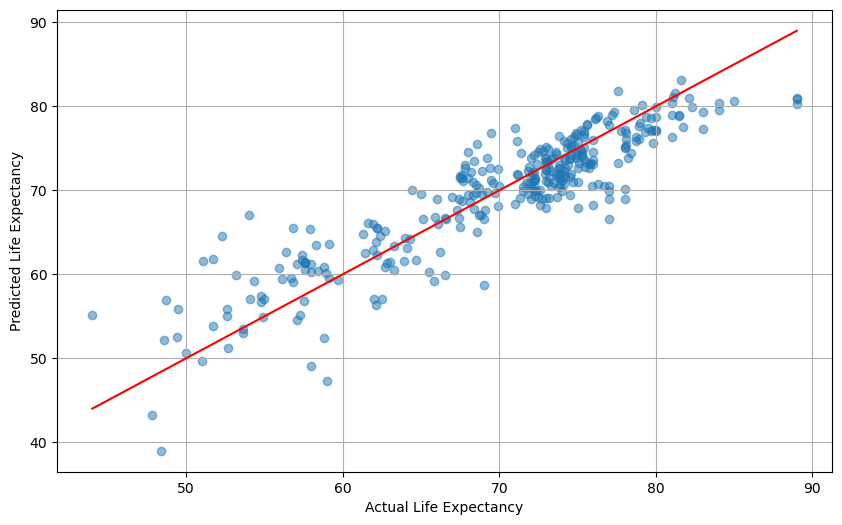

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect prediction
plt.grid(True)
plt.show()